# SVD (Parte II)

# Fonte da aula

https://dl.acm.org/doi/abs/10.1145/1090191.1080118

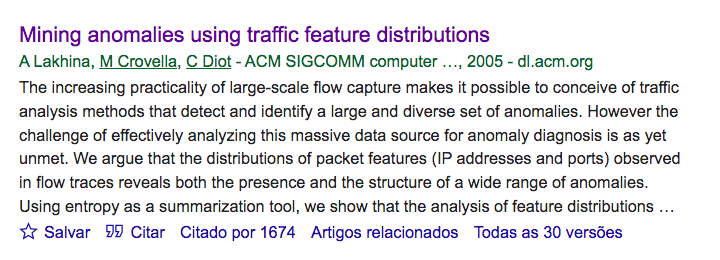

# Preliminares

Como de costume, vamos considerar nosso conjunto de dados como sendo uma matriz real.

$${\mbox{$m$ objetos}}\left\{\begin{array}{c}\;\\\;\\\;\\\;\\\;\end{array}\right.\;\;\overbrace{\left[\begin{array}{ccccc}
\begin{array}{c}x_{11}\\\vdots\\x_{i1}\\\vdots\\x_{m1}\end{array}&
\begin{array}{c}\dots\\\ddots\\\dots\\\ddots\\\dots\end{array}&
\begin{array}{c}x_{1j}\\\vdots\\x_{ij}\\\vdots\\x_{mj}\end{array}&
\begin{array}{c}\dots\\\ddots\\\dots\\\ddots\\\dots\end{array}&
\begin{array}{c}x_{1n}\\\vdots\\x_{in}\\\vdots\\x_{mn}\end{array}
\end{array}\right]}^{\mbox{$n$ features}} = \mathbf{X}$$

## Encontrando Aproximações de Rank $k$

Há um método celebrado para encontrar a melhor aproximação de rank $k$ de uma matriz: SVD (*Singular Value Decomposition*).

> SVD is "the Rolls-Royce and the Swiss Army Knife of Numerical Linear Algebra.”

Dianne O’Leary, MMDS ’06

A decomposição em valores singulares de uma matriz $\mathbf{X}$, de rank $r$, tem a forma

$$\mathbf{X} = \mathbf{U}\mathbf{S} \mathbf{V}^T$$

onde

1. $\mathbf{U}$ é $m\times r$
2. As colunas de $\mathbf{U}$ são mutualmente ortogonais e têm normas unitárias
3. $\mathbf{V}$ é $n\times r$
4. As colunas de $\mathbf{V}$ são mutualmente ortogonais e têm normas unitárias
5. A matriz $\mathbf{S}$ é uma matriz diagonal $r \times r$. Os valores da diagonal são $\sigma_1 \geq \sigma_2 \geq \dots \geq \sigma_r > 0$.

Representação

$$ \left[\begin{array}{cccc}\begin{array}{c}\vdots\\\vdots\\{\bf x_1}\\\vdots\\\vdots\end{array}&\begin{array}{c}\vdots\\\vdots\\{\bf x_2}\\\vdots\\\vdots\end{array}&\dots&\begin{array}{c}\vdots\\\vdots\\{\bf x_n}\\\vdots\\\vdots\end{array}\\\end{array}\right] =
\overbrace{\left[\begin{array}{ccc}
\vdots&&\vdots\\
\vdots&&\vdots\\
\mathbf{u}_1&\cdots&\mathbf{u}_r\\
\vdots&&\vdots\\
\vdots&&\vdots\end{array}\right]}^{\large r}
\times
\left[\begin{array}{ccc}
\sigma_1&~\\
~&\ddots&\\
~&&\sigma_r\\
\end{array}\right]
\times
\left[\begin{array}{ccccc}\dots&\dots&\mathbf{v}_1&\dots&\dots\\
&&\vdots&&\\
\dots&\dots&\mathbf{v}_r&\dots&\dots
\end{array}\right]$$

SVD é útil para encontrar aproximação de matrizes.

Em particular, para uma matriz $m\times n$, $\mathbf{X}$, SVD nos dá duas coisas:
1. A melhor aproximação de rank $k$ de $\mathbf{X}$, para qualquer $1 \le k \le \text{rank}(\mathbf{X})$
2. O erro que está sendo cometido na aproximação.

A melhor aproximação de rank $k$ de $\mathbf{X}$ é formada a partir de
* $\mathbf{U}_k =$ as primeiras $k$ colunas de $\mathbf{U}$
* $\mathbf{S}_k = $ a submatriz superior esquerda $k \times k$ de $\Sigma$
* $\mathbf{V}_k= $ as $k$ primeiras colunas de $\mathbf{V}$.

Com isso, a aproximação é dada por:

$$ \mathbf{X}_k = \mathbf{U}_k\mathbf{S}_k\mathbf{V}_k^T.$$



Além disso, o erro de aproximação (de acordo com a norma de Frobenius) é dado por
$$\Vert\mathbf{X} - \mathbf{X}_k\Vert_F = \sqrt{\sum_{i=k+1}^r\sigma^2_i}.$$

## Exemplos e Aplicações

### Exemplo Ilustrativo I

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
time = np.arange(0, 100, 0.1);

df = pd.DataFrame(index = time)
df["X1"] = np.sin(time)
df["X2"] = 2 * np.sin(time)
df["X3"] = 3 * np.sin(time)
df["X4"] = 4 * np.sin(time)
df["X5"] = 5 * np.sin(time)
df.head()

,X1,X2,X3,X4,X5
0.0,0.000000,0.000000,0.000000,0.000000,0.000000
0.1,0.099833,0.199667,0.299500,0.399334,0.499167
0.2,0.198669,0.397339,0.596008,0.794677,0.993347
0.3,0.295520,0.591040,0.886561,1.182081,1.477601
0.4,0.389418,0.778837,1.168255,1.557673,1.947092


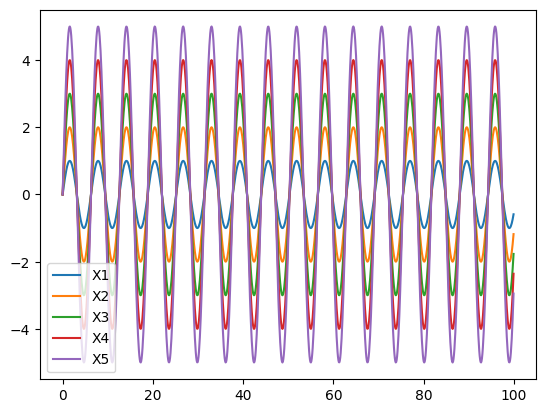

In [ ]:
df.plot();

#### O que acontece ao aplicar SVD a estes dados?

In [ ]:
u, s, vt = np.linalg.svd(df, full_matrices = False)
u.shape, s.shape, vt.shape

((1000, 5), (5,), (5, 5))

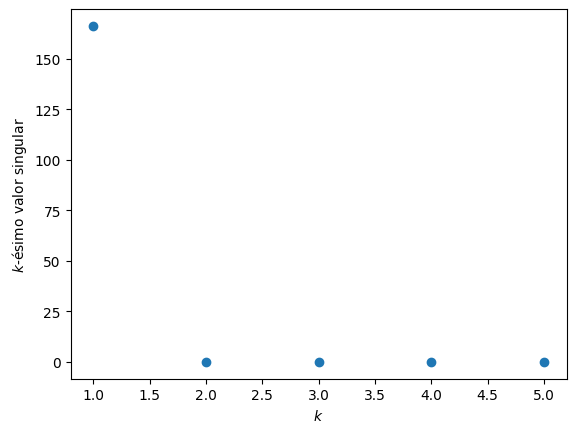

In [ ]:
plt.scatter(np.arange(1, len(s) + 1), s)
plt.xlabel(r"$k$")
plt.ylabel(r"$k$-ésimo valor singular");

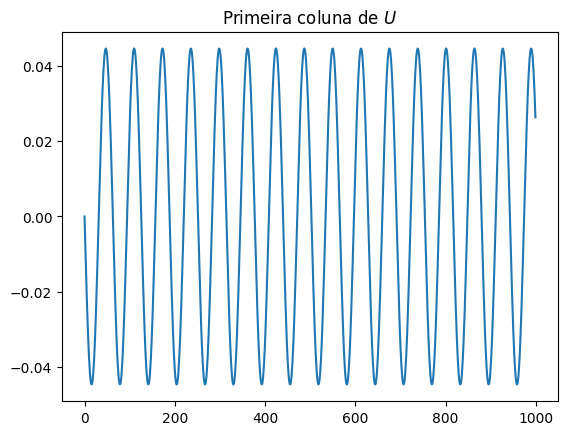

In [ ]:
plt.title(r'Primeira coluna de $U$')
plt.plot(u[:, 0]);

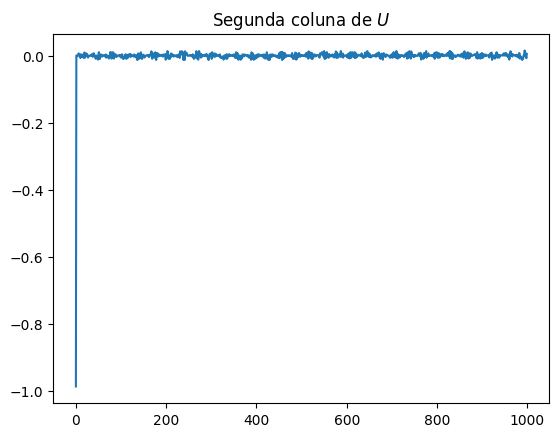

In [ ]:
plt.title(r'Segunda coluna de $U$')
plt.plot(u[:, 1]);

#### Resumo

- Praticamente toda a informação da matriz pode ser representada por uma matriz de rank 1
- Podemos pensar em $\mathbf{V}$ como sendo uma nova base para a representação dos dados
- Da aula passada, sabemos que essa base é formada pelas direções ortogonais de maior variância dos dados
- Assim, $\mathbf{US}$ são os coeficientes (representação) dos dados na nova base.
- Por isso, as colunas de $\mathbf{U}$ contêm os padrões dos dados. Neste caso, só é "importante" em $\mathbf{U}$ os coeficientes multiplicados pela primeira componente principal, i.e., a primeira coluna de $\mathbf{U}$.


### Exemplo Ilustrativo II

In [ ]:
df2 = df.copy()
df2['X6'] = np.cos(time)
df2['X7'] = 2 * np.cos(time)
df2['X8'] = 3 * np.cos(time)

In [ ]:
df2.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000
0.1,0.099833,0.199667,0.299500,0.399334,0.499167,0.995004,1.990008,2.985012
0.2,0.198669,0.397339,0.596008,0.794677,0.993347,0.980067,1.960133,2.940200
0.3,0.295520,0.591040,0.886561,1.182081,1.477601,0.955336,1.910673,2.866009
0.4,0.389418,0.778837,1.168255,1.557673,1.947092,0.921061,1.842122,2.763183


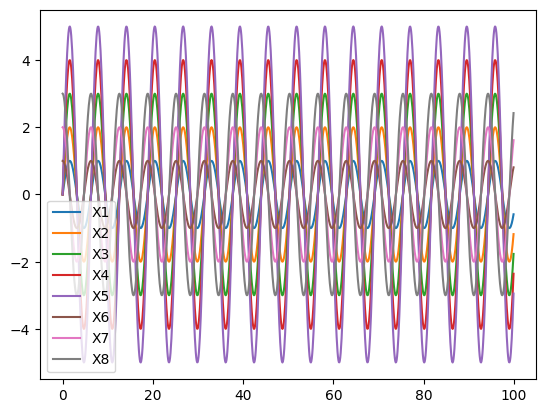

In [ ]:
df2.plot();

In [ ]:
u, s, vt = np.linalg.svd(df2, full_matrices = False)
u.shape, s.shape, vt.shape

((1000, 8), (8,), (8, 8))

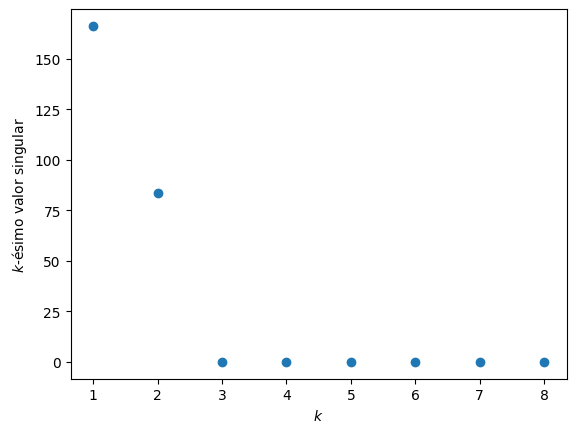

In [ ]:
plt.scatter(np.arange(1, len(s) + 1), s)
plt.xlabel(r"$k$")
plt.ylabel(r"$k$-ésimo valor singular");

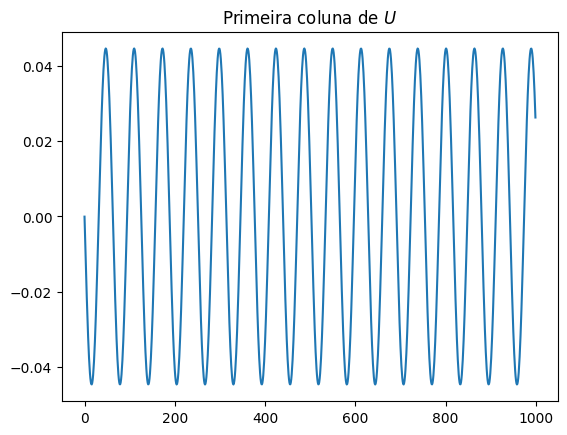

In [ ]:
plt.title(r'Primeira coluna de $U$')
plt.plot(u[:, 0]);

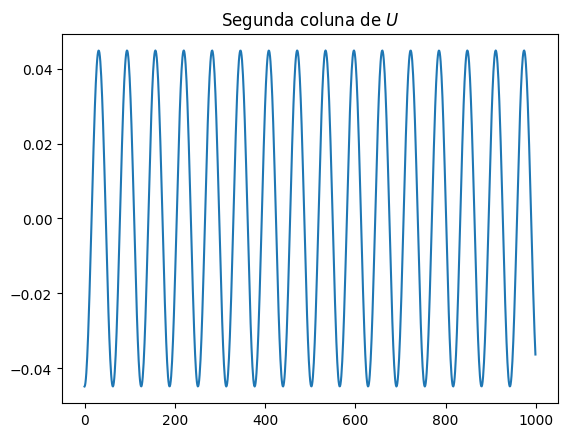

In [ ]:
plt.title(r'Segunda coluna de $U$')
plt.plot(u[:, 1]);

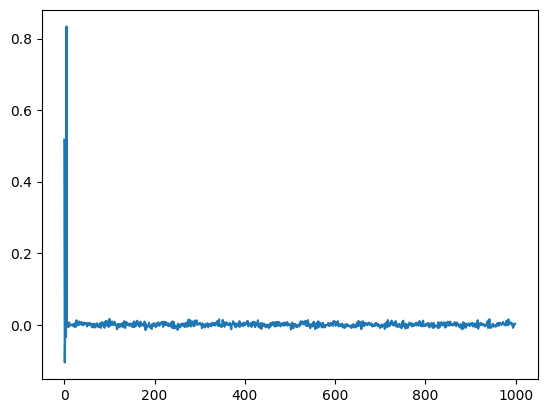

In [ ]:
plt.plot(u[:, 2]);

### Exemplo Ilustrativo III

In [ ]:
from scipy.stats import norm
df3 = pd.DataFrame(index = time)
df3['X1'] = np.sin(time)
df3['X2'] = np.cos(time)
df3['X3'] = df3['X1'] + df3['X2'] + norm.rvs(loc = 0, scale = 1, size=1000)
df3['X4'] = 3 * df3['X1'] - 10 * df3['X2'] + norm.rvs(loc = 0, scale = 1, size=1000)
df3['X5'] = -7 * df3['X1'] + 4 * df3['X2'] + norm.rvs(loc = 0, scale = 1, size=1000)
df3['X6'] = 2 * df3['X1'] - df3['X2'] + norm.rvs(loc = 0, scale = 1, size=1000)

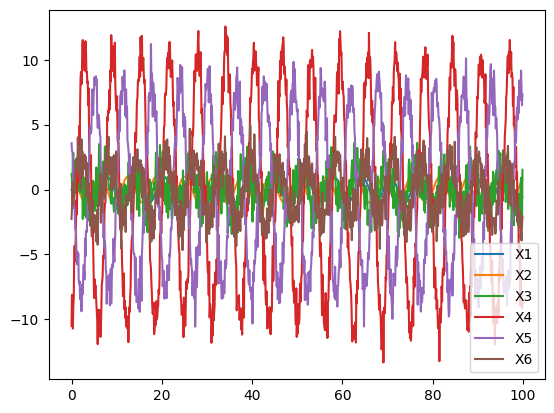

In [ ]:
df3.plot();

In [ ]:
u, s, vt = np.linalg.svd(df3, full_matrices = False)
u.shape, s.shape, vt.shape

((1000, 6), (6,), (6, 6))

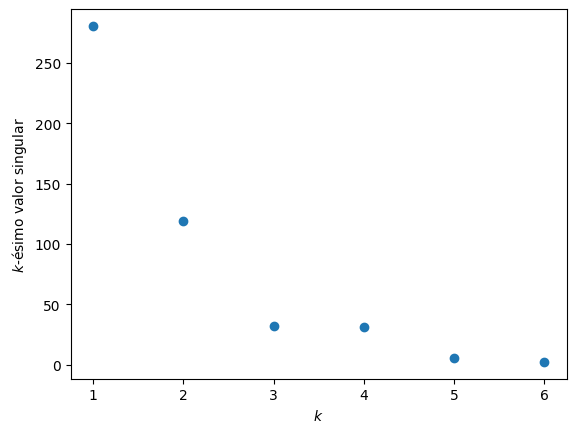

In [ ]:
plt.scatter(np.arange(1, len(s) + 1), s)
plt.xlabel(r"$k$")
plt.ylabel(r"$k$-ésimo valor singular");

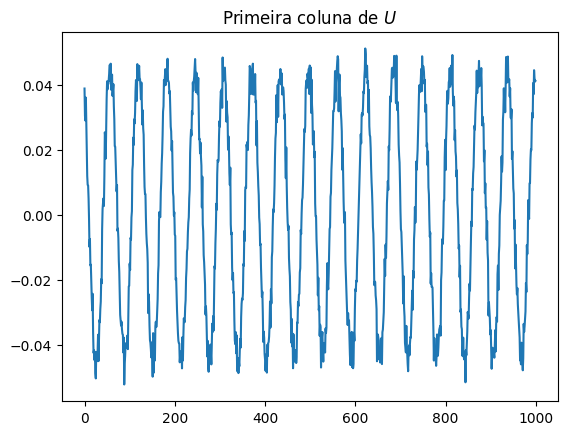

In [ ]:
plt.title(r'Primeira coluna de $U$')
plt.plot(u[:, 0]);

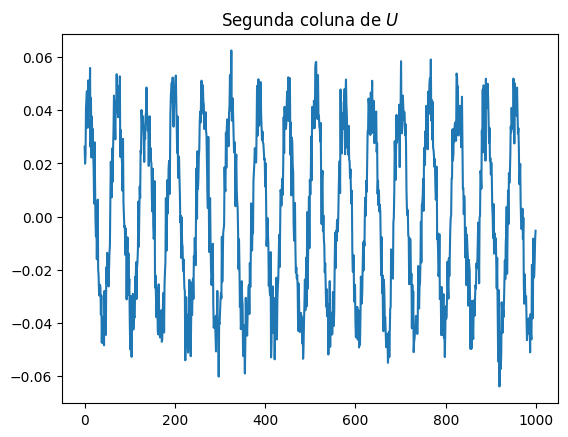

In [ ]:
plt.title(r'Segunda coluna de $U$')
plt.plot(u[:, 1]);

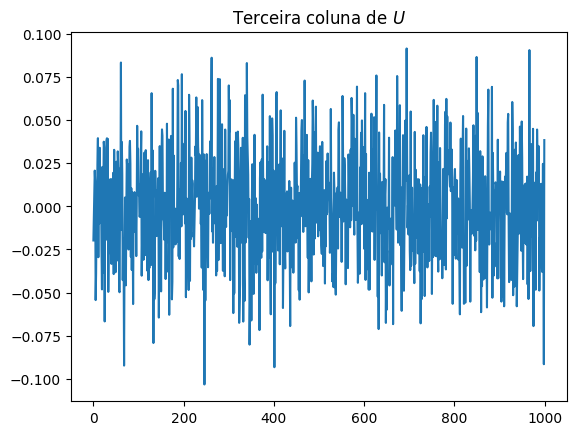

In [ ]:
plt.title(r'Terceira coluna de $U$')
plt.plot(u[:, 2]);

Sabemos, da aula passada, calcular a melhor aproximação de rank 2 para essa matriz de dados.

In [ ]:
approx = pd.DataFrame(data = u[:, :2] @ np.diag(s[:2]) @ vt[:2, :], index = time)
approx.columns = 'X1 X2 X3 X4 X5 X6'.split()
approx.head()

,X1,X2,X3,X4,X5,X6
0.0,0.011887,1.031655,1.117986,-10.478150,3.915298,-1.066247
0.1,-0.003359,0.799699,0.853238,-8.158929,3.126254,-0.853528
0.2,0.073306,0.810986,0.946930,-8.050340,2.613532,-0.700751
0.3,0.316319,1.153659,1.572726,-10.833449,2.178680,-0.541260
0.4,0.473434,1.036684,1.614621,-9.183173,0.584470,-0.079889


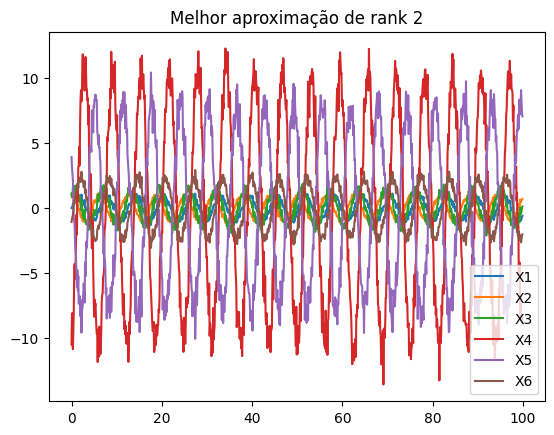

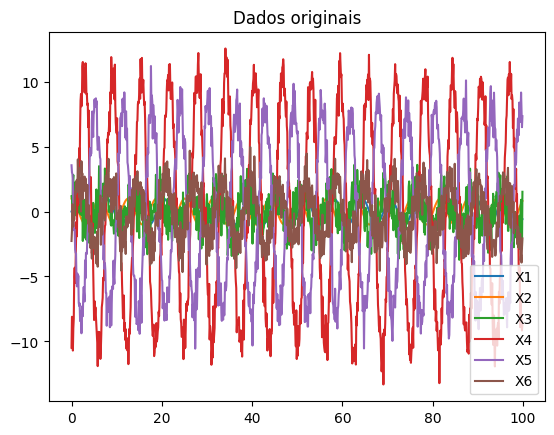

In [ ]:
approx.plot(title = 'Melhor aproximação de rank 2');
df3.plot(title = 'Dados originais');

#### Mas e o que sobra?

In [ ]:
error = df3 - approx

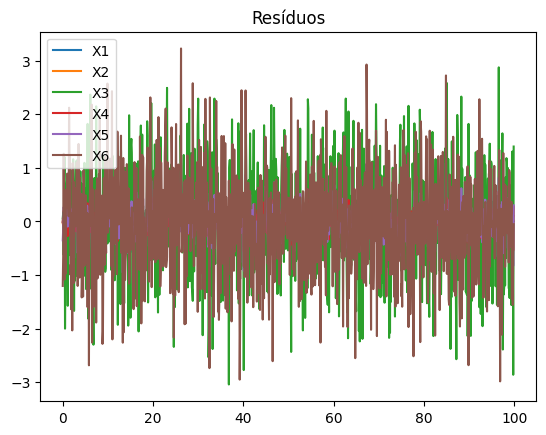

In [ ]:
error.plot(title = 'Resíduos');

Veja que os resíduos são bem similares a um ruído. O que é muito interessante!

### Exemplo Ilustrativo IV

Vamos considerar os mesmos dados, mas vamos "inserir" anomalias.

In [ ]:
df4 = df3.copy()

df4.iloc[50, :] = [3, 3, 0, 0, 3, 3]
df4.iloc[100, :] = [-5, -5, 0, 0, 3, 3]
df4.iloc[500, :] = [-5, -5, 0, 0, 3, 3]

Veja que os dados são basicamente os mesmo, exceto por três posições do conjunto de dados. Vamos repetir os passos do exemplo anterior.

In [ ]:
u, s, vt = np.linalg.svd(df4, full_matrices = False)
u.shape, s.shape, vt.shape

((1000, 6), (6,), (6, 6))

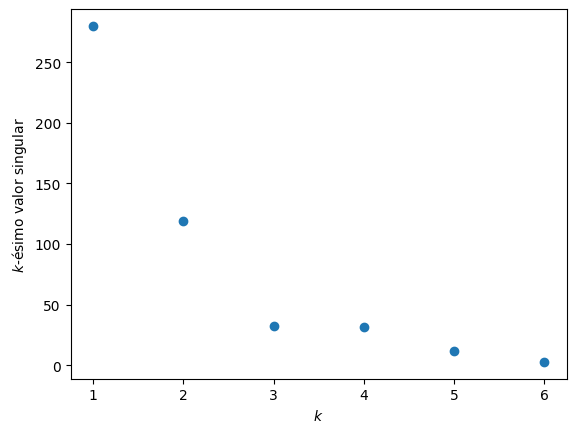

In [ ]:
plt.scatter(np.arange(1, len(s) + 1), s)
plt.xlabel(r"$k$")
plt.ylabel(r"$k$-ésimo valor singular");

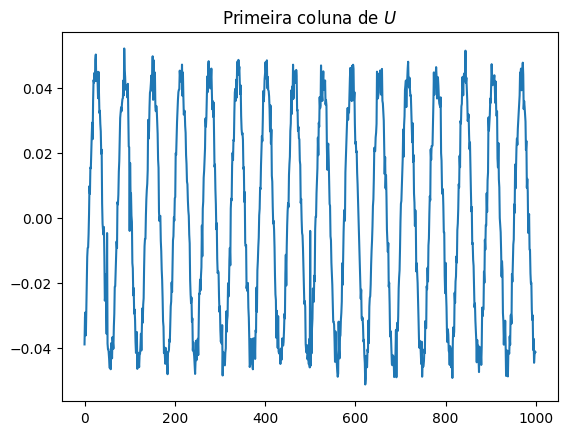

In [ ]:
plt.title(r'Primeira coluna de $U$')
plt.plot(u[:, 0]);

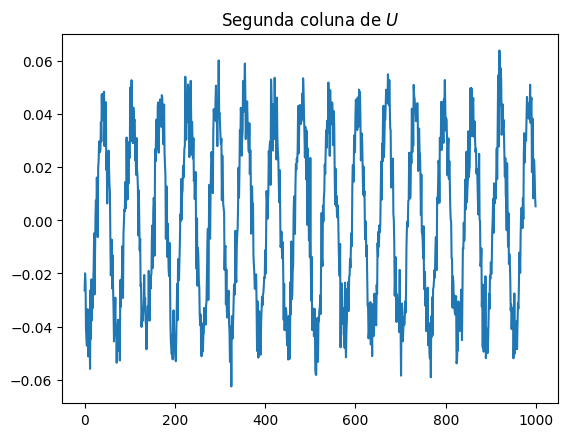

In [ ]:
plt.title(r'Segunda coluna de $U$')
plt.plot(u[:, 1]);

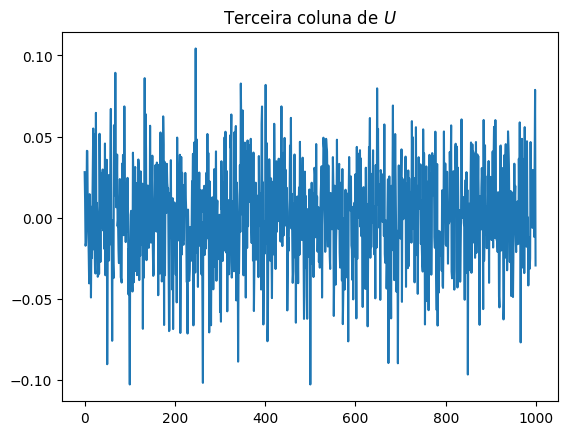

In [ ]:
plt.title(r'Terceira coluna de $U$')
plt.plot(u[:, 2]);

#### Mas e o que sobra?

In [ ]:
approx = pd.DataFrame(data = u[:, :2] @ np.diag(s[:2]) @ vt[:2, :], index = time)
approx.columns = 'X1 X2 X3 X4 X5 X6'.split()
approx.head()

,X1,X2,X3,X4,X5,X6
0.0,0.016619,1.036468,1.118716,-10.478540,3.913053,-1.070515
0.1,0.000192,0.803318,0.853785,-8.159200,3.124637,-0.856748
0.2,0.076928,0.814924,0.946432,-8.048648,2.614543,-0.705593
0.3,0.323492,1.161211,1.572450,-10.832087,2.177976,-0.549622
0.4,0.481643,1.045184,1.614689,-9.182728,0.582107,-0.088774


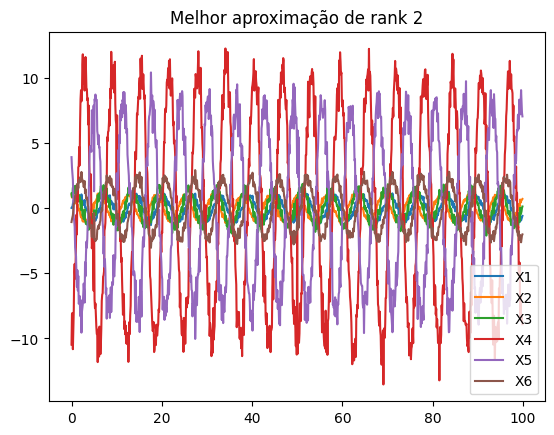

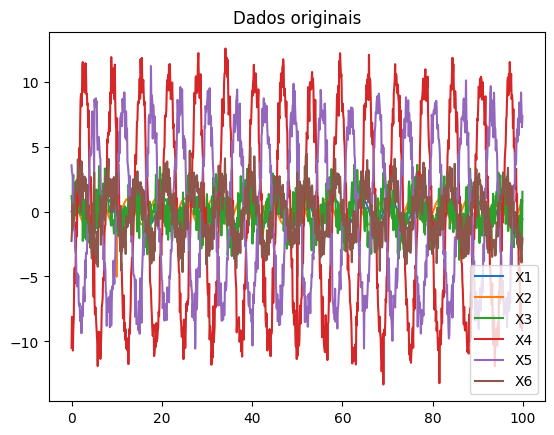

In [ ]:
approx.plot(title = 'Melhor aproximação de rank 2');
df4.plot(title = 'Dados originais');

In [ ]:
error = df4 - approx

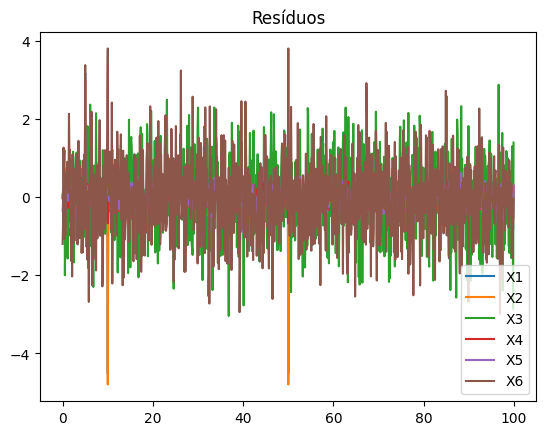

In [ ]:
error.plot(title = 'Resíduos');

Por fim, vamos olhar para a norma dos resíduos

In [ ]:
errorNorm = np.linalg.norm(error, axis=1)

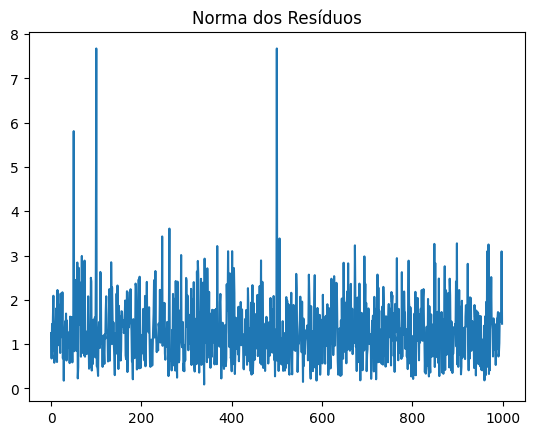

In [ ]:
plt.title("Norma dos Resíduos")
plt.plot(errorNorm);

### Tráfego em redes

Vamos considerar os dados de tráfego na rede Abilene (Fonte: Internet2, circa 2005).

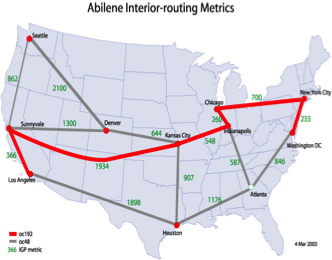

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!rm -rf datasets-minicurso
!git clone https://github.com/gaabrielfranco/datasets-minicurso.git

Cloning into 'datasets-minicurso'...
remote: Enumerating objects: 14407, done.
remote: Total 14407 (delta 0), reused 0 (delta 0), pack-reused 14407
Receiving objects: 100% (14407/14407), 59.52 MiB | 13.94 MiB/s, done.
Resolving deltas: 100% (26/26), done.
Updating files: 100% (14398/14398), done.


In [ ]:
X = pd.read_csv('datasets-minicurso/abilene_traffic.csv', index_col = 0)
X.head()

,ATLA-ATLA,ATLA-CHIN,ATLA-DNVR,ATLA-HSTN,ATLA-IPLS,ATLA-KSCY,ATLA-LOSA,ATLA-NYCM,ATLA-SNVA,ATLA-STTL,...,WASH-CHIN,WASH-DNVR,WASH-HSTN,WASH-IPLS,WASH-KSCY,WASH-LOSA,WASH-NYCM,WASH-SNVA,WASH-STTL,WASH-WASH
2003-09-01 00:00:00,8466132.0,29346537.0,15792104.0,3646187.0,21756443.0,10792818.0,14220940.0,25014340.0,13677284.0,10591345.0,...,53296727.0,18724766.0,12238893.0,52782009.0,12836459.0,31460190.0,105796930.0,13756184.0,13582945.0,120384980.0
2003-09-01 00:10:00,20524567.0,28726106.0,8030109.0,4175817.0,24497174.0,8623734.0,15695839.0,36788680.0,5607086.0,10714795.0,...,68413060.0,28522606.0,11377094.0,60006620.0,12556471.0,32450393.0,70665497.0,13968786.0,16144471.0,135679630.0
2003-09-01 00:20:00,12864863.0,27630217.0,7417228.0,5337471.0,23254392.0,7882377.0,16176022.0,31682355.0,6354657.0,12205515.0,...,67969461.0,37073856.0,15680615.0,61484233.0,16318506.0,33768245.0,71577084.0,13938533.0,14959708.0,126175780.0
2003-09-01 00:30:00,10856263.0,32243146.0,7136130.0,3695059.0,28747761.0,9102603.0,16200072.0,27472465.0,9402609.0,10934084.0,...,66616097.0,43019246.0,12726958.0,64027333.0,16394673.0,33440318.0,79682647.0,16212806.0,16425845.0,112891500.0
2003-09-01 00:40:00,10068533.0,30164311.0,8061482.0,2922271.0,35642229.0,9104036.0,12279530.0,29171205.0,7624924.0,11327807.0,...,66797282.0,40408580.0,11733121.0,54541962.0,16769259.0,33927515.0,81480788.0,16757707.0,15158825.0,123140310.0


In [ ]:
X.shape

(1008, 121)

Como esperado, a matriz de tráfego tem rank completo (i.e., 121).

In [ ]:
np.linalg.matrix_rank(X)

121

No entanto, talvez, ela tenha **baixo rank efetivo**.

Vamos obter a decomposição em valores singulares de $\mathbf{X}$.

In [ ]:
u, s, vt = np.linalg.svd(X)

Vamos olhar os valores singulares da matriz.

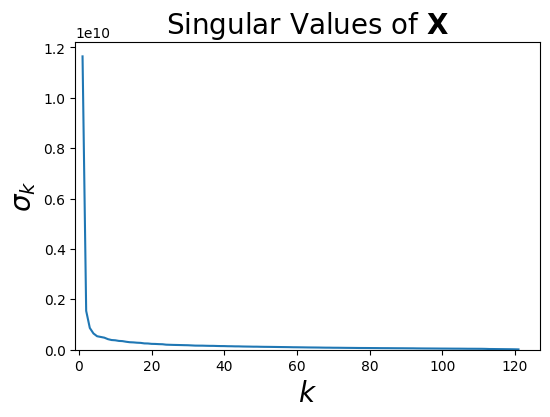

In [ ]:
fig = plt.figure(figsize=(6,4))
plt.plot(range(1,1+len(s)),s)
plt.xlabel(r'$k$',size=20)
plt.ylabel(r'$\sigma_k$',size=20)
plt.ylim(ymin = 0)
plt.xlim(xmin = -1)
plt.title(r'Singular Values of $\mathbf{X}$',size=20);

Observando apenas os valores pequenos de $k$, pode-se perceber que o "cotovelo" da curva está na região de 4 - 6 valores singulares.

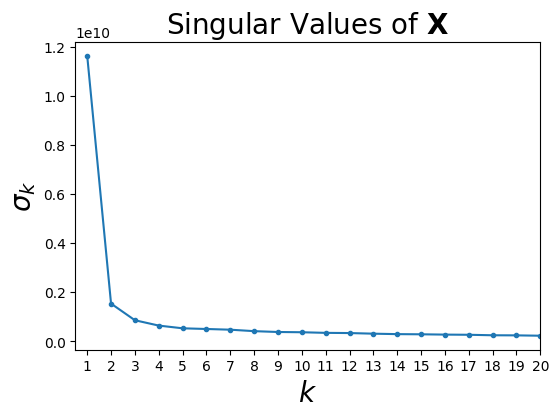

In [ ]:
fig = plt.figure(figsize = (6, 4))
plt.plot(range(1, 21), s[0:20], '.-')
plt.xlim([0.5, 20])
plt.xlabel(r'$k$', size=20)
plt.xticks(range(1, 21))
plt.ylabel(r'$\sigma_k$', size=20);
plt.title(r'Singular Values of $\mathbf{X}$',size=20);

Esse padrão de valores singulares sugere **baixo rank efetivo**.

Vamos observar o erro de aproximação de rank $k$ para diversos valores de $k$.

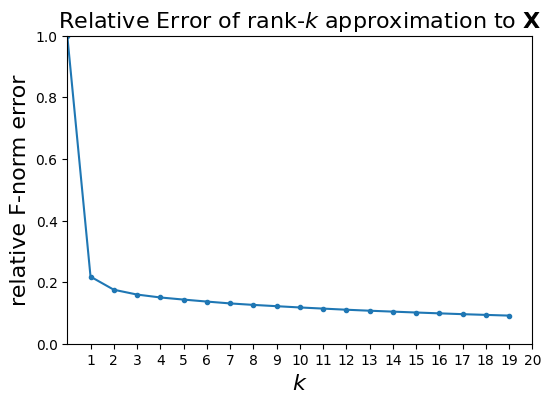

In [ ]:
fig = plt.figure(figsize = (6, 4))
Anorm = np.linalg.norm(X)
err = np.cumsum(s[::-1]**2)
err = np.sqrt(err[::-1])
plt.plot(range(0, 20), err[:20]/Anorm, '.-')
plt.xlim([0, 20])
plt.ylim([0, 1])
plt.xticks(range(1, 21))
plt.xlabel(r'$k$', size = 16)
plt.ylabel(r'relative F-norm error', size=16)
plt.title(r'Relative Error of rank-$k$ approximation to $\mathbf{X}$', size=16);

Interessantemente, com uma aproximação de rank 20, tem-se apenas 9% de erro.

Mas, ao invés de armazenar

* $mn =$ (1008 $\cdot$ 121) = 121,968 valores,

teríamos que armazenar apenas

* $k(m+n)$ = 20 $\cdot$ (1008 + 121) = 22,580 valores,

o que é uma redução de 81%.

#### Tráfego total

O tráfego total ao longo do tempo é dado pela figura a seguir.

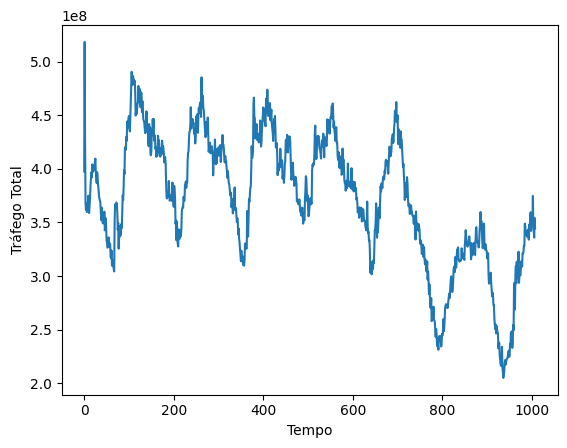

In [ ]:
Xnorm = np.linalg.norm(X, axis = 1)

plt.plot(Xnorm)
plt.xlabel('Tempo')
_ = plt.ylabel('Tráfego Total')

#### Como identificar anomalias?

Há intervalos de tempo em que o tráfego da matriz $X$ pode ser considerado anômalo?

Vamos assumir que o tráfego é não anômalo na maior parte do tempo. Daí, podemos tentar explorar o fenômeno de baixa dimensionalidade da seguinte forma:

1.   Obtenha a decomposição em valores singulares de $\mathbf{X}$
$$\mathbf{X} = \mathbf{USV}^T$$

2.   Obtenha a aproximação de $\mathbf{X}$ com *rank* $k$
$$\mathbf{X}_k = \mathbf{U}_k\mathbf{S}_k\mathbf{V}_k^T$$

3.   Compute a porção de $\mathbf{X}$ que não pode ser explicada por $\mathbf{X}_k$
$$\mathbf{O} = \mathbf{X} - \mathbf{X}_k$$

4.  Identifique as linhas de $\mathbf{O}$ com as maiores normas



#### Aplicando SVD

Primeiro, precisamos encontrar a decomposição em valores singulares de $\mathbf{X}$ e determinar o valor de $k$

In [ ]:
U, s, Vt = np.linalg.svd(X, full_matrices = False)
V = Vt.T

#### Determinando o *rank* efetivo

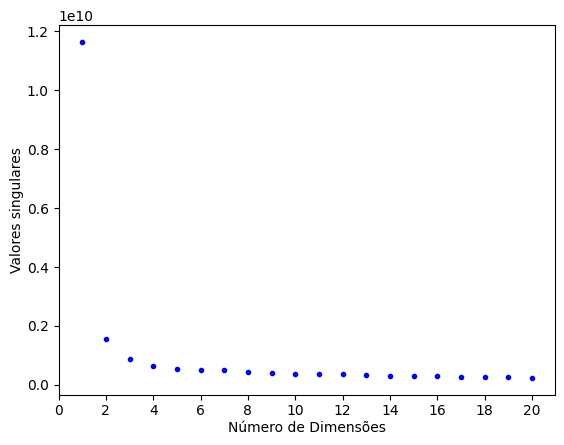

In [ ]:
plt.plot(range(1, 1 + 20), s[:20], 'b.')
_ = plt.ylabel('Valores singulares', labelpad = 2)
_ = plt.xlabel('Número de Dimensões', labelpad = 2)
_ = plt.xticks(range(0, 21, 2))

#### Matrizes $\mathbf{X}_k$ e $\mathbf{O}$

In [ ]:
k = 6

Uk = U[:, :k]
Sk = np.diag(s[:k])
Vk = V[:, :k]
Vkt = Vk.T

N = np.dot(Uk, np.dot(Sk, Vkt))
O = X - N

#### Tráfego residual total

Veja que há um ruído + *outliers*

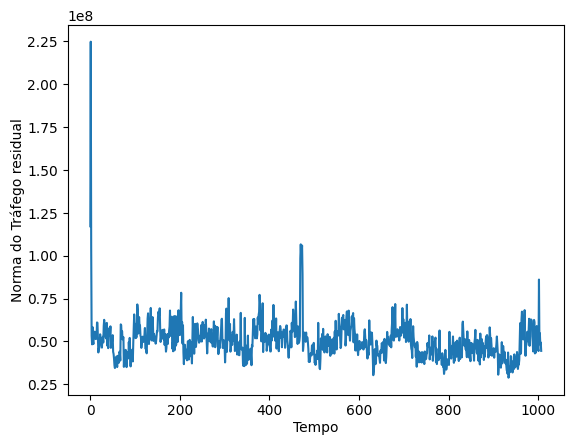

In [ ]:
Onorm = np.linalg.norm(O, axis=1)
plt.plot(Onorm)
plt.xlabel('Tempo', labelpad = 2)
_ = plt.ylabel('Norma do Tráfego residual', labelpad = 2)

#### Determinando *outliers*

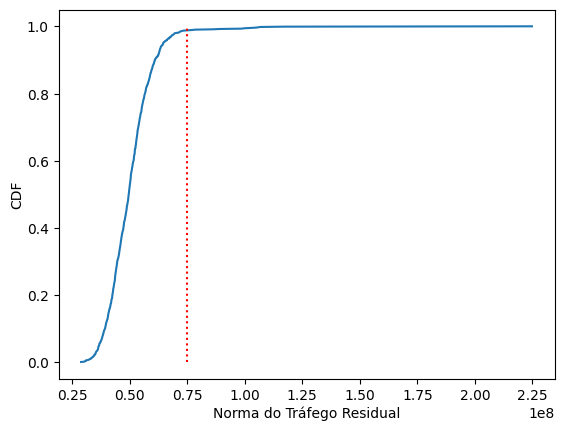

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(Onorm)

Xnorm = np.linalg.norm(X, axis=1)
plt.plot(ecdf.x, ecdf.y)
plt.plot([0.75 * 100000000, 0.75 * 100000000], [0, 1], 'r:')
plt.ylabel('CDF', labelpad = 2)
_ = plt.xlabel('Norma do Tráfego Residual', labelpad = 2)

In [ ]:
values = list(filter(lambda w: w > 0.75 * 10 ** 8, Onorm))
print(len(values))

13


#### Visualizando períodos de tráfego anômalo

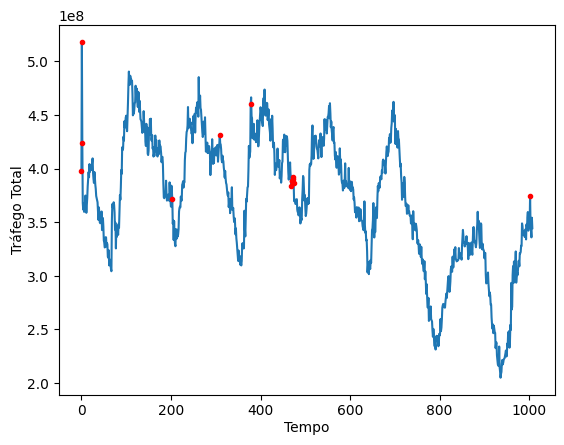

In [ ]:
anomalies = np.argsort(Onorm)[-13:]
plt.plot(Xnorm)
plt.plot(anomalies, Xnorm[anomalies],'r.', lw = 0.5)

plt.ylabel('Tráfego Total', labelpad = 2)
_ = plt.xlabel('Tempo', labelpad = 2)

#### Do ponto de vista dos pares origem-destino

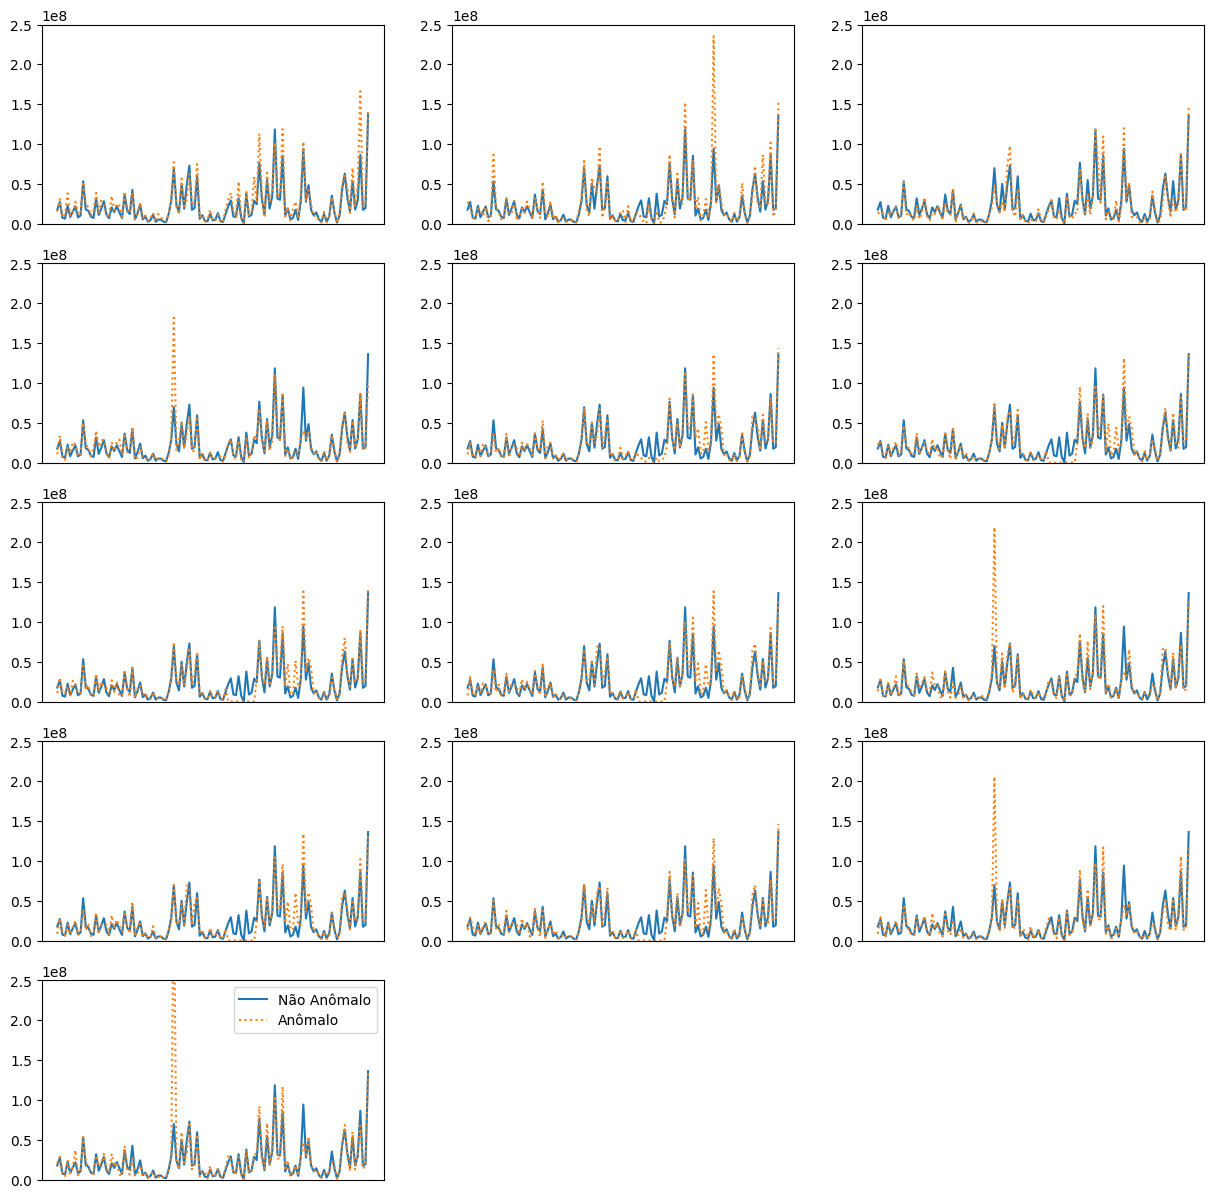

In [ ]:
plt.figure(figsize=(15,15))
a = 13
anomalies = np.argsort(Onorm)[-a:]
normal = np.argsort(Onorm)[:-a]
for i in range(a):
  plt.subplot(5, 3, i + 1)
  X.iloc[normal, :].mean(axis = 0).plot(label = "Não Anômalo")
  X.iloc[anomalies[i], :].plot(label = 'Anômalo', linestyle=":")
  plt.xticks([], [])
  plt.ylim(0, 2.5 * 10e7)
_ = plt.legend(loc = "best")

#### Por que é anômalo?

Repare que não necessariamente o tráfego anômalo é explicado por um *outlier* global.

O tráfego anômalo não se comporta como uma combinação linear das componentes a seguir.

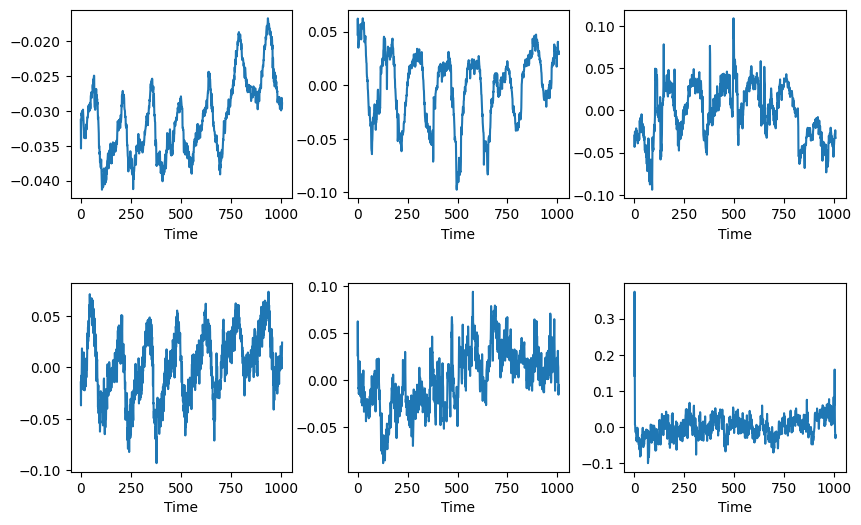

In [ ]:
plt.figure(figsize=(10,6))
for i in range(1, 7):
    ax = plt.subplot(2,3,i)
    plt.plot(U[:,i-1])
    plt.xlabel('Time')
plt.subplots_adjust(wspace=0.25, hspace=0.45)

# What is next?